In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

### 讀入資料庫

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_train.shape

(60000,)

### 平常CNN辨識RGB三個channel但我們現在只有黑白一個Channel, 所以(28,28) 改成 (28,28,1)

In [5]:
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1)/255

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Step1  定義LeNet函數學習機(CNN) 這邊選擇三層CNN架構 Filter大小為5*5   數量分別為16 32 64  最後再加兩層神經個數為128 64的全連結層

In [8]:
#Build LetNet model with Keras
def LetNet(width, height, depth, classes):
    # initialize the model
    model = Sequential()

    # first layer, convolution and pooling曾 
    model.add(Conv2D(input_shape=(width, height, depth), filters=16, kernel_size=(5,5), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # second layer, convolution and pooling
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Third layer, convolution and pooling
    model.add(Conv2D(filters=64, kernel_size=(5,5), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Fully connection layer x2
    model.add(Flatten())
    model.add(Dense(128,activation = 'relu'))
    model.add(Dense(64,activation = 'relu'))

    # softmax classifier
    model.add(Dense((classes), activation="softmax"))

    return model

In [9]:
model = LetNet(28,28,1,10)
model.summary()

#第一層  [3*3(權重)+1(bias)] * 16 = 160 
#第二層  [16*3*3(權重)+1(bias)] * 32 = 4640
#第三層 [32*3*3(權重)+1(bias)]* 64 = 18496


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [10]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"]) #losst function嘗試用分類熵

### Step 2. Fit 這邊選擇 batch size 100 訓練10個迭代 並將訓練資料的1/6作為驗證資料以確保模型沒有過度訓練

In [11]:
History = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split = 1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 146s 3ms/sample - loss: 1.4772 - accuracy: 0.5141 - val_loss: 0.8494 - val_accuracy: 0.6827
Epoch 2/10
50000/50000 [==============================] - 158s 3ms/sample - loss: 0.7089 - accuracy: 0.7322 - val_loss: 0.6295 - val_accuracy: 0.7702
Epoch 3/10
50000/50000 [==============================] - 157s 3ms/sample - loss: 0.5995 - accuracy: 0.7765 - val_loss: 0.6082 - val_accuracy: 0.7630
Epoch 4/10
50000/50000 [==============================] - 150s 3ms/sample - loss: 0.5406 - accuracy: 0.8015 - val_loss: 0.5144 - val_accuracy: 0.8051
Epoch 5/10
50000/50000 [==============================] - 146s 3ms/sample - loss: 0.4951 - accuracy: 0.8189 - val_loss: 0.4742 - val_accuracy: 0.8261
Epoch 6/10
50000/50000 [==============================] - 208s 4ms/sample - loss: 0.4627 - accuracy: 0.8309 - val_loss: 0.4773 - val_accuracy: 0.8228
Epoch 7/10
50000/50000 [==========================

### Step 3. 預測

In [12]:
result = model.predict_classes(x_test)

In [13]:
def predict(n):
    print('CNN預測是:', class_names[result[n]])
    x = x_test[n].reshape(28,28)
    plt.imshow(x, cmap="Greys")

CNN預測是: Shirt


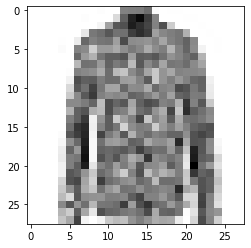

In [14]:
predict(101)

### 看看測試資料與模型配適的如何

In [15]:
看看測試資料與模型配飾的如何score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 10s 972us/sample - loss: 0.3973 - accuracy: 0.8584


In [16]:
loss, acc = score
print("測試資料正確率 = ", round(acc*100,2), "%")

測試資料正確率 =  85.84 %


### 從圖形來看訓練和驗證資料並沒有偏離太多，沒有過度訓練的問題

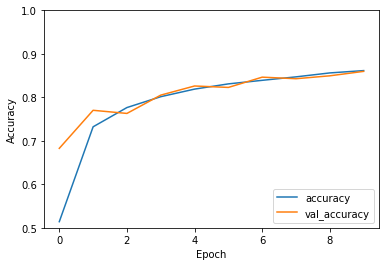

In [23]:
plt.plot(History.history['accuracy'], label='accuracy')
plt.plot(History.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

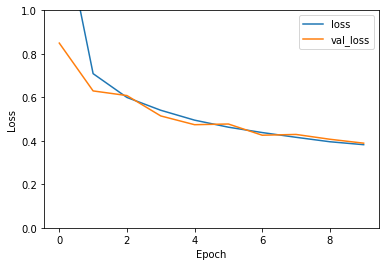

In [24]:
plt.plot(History.history['loss'], label='loss')
plt.plot(History.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')